# Constructing the data-set

## FMA: A Dataset For Music Analysis

Michaël Defferrard, Kirell Benzi, Pierre Vandergheynst, Xavier Bresson, EPFL LTS2.

## Analysis

All numbers and figures which appear in the [paper] and much more.

[paper]: https://arxiv.org/abs/1612.01840

In [73]:
# Basics
import numpy as np
import pandas as pd
import sklearn

# Plots
import matplotlib.pyplot as plt
%matplotlib inline

# Datasets

The data is composed of several datasets, 

In [2]:
albums = pd.read_csv("~/fma_metadata/raw_albums.csv", index_col=0)
albums.head()

,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_handle,album_image_file,album_images,album_information,album_listens,album_producer,album_title,album_tracks,album_type,album_url,artist_name,artist_url,tags
album_id,,,,,,,,,,,,,,,,,,
1,0,11/26/2008 01:44:45 AM,1/05/2009,NaN,4,AWOL_-_A_Way_Of_Life,https://freemusicarchive.org/file/images/album...,"[{'image_id': '1955', 'image_file': 'https://f...",<p></p>,6073,NaN,AWOL - A Way Of Life,7,Album,http://freemusicarchive.org/music/AWOL/AWOL_-_...,AWOL,http://freemusicarchive.org/music/AWOL/,[]
100,0,11/26/2008 01:55:44 AM,1/09/2009,NaN,0,On_Opaque_Things,https://freemusicarchive.org/file/images/album...,"[{'image_id': '4403', 'image_file': 'https://f...",NaN,5613,NaN,On Opaque Things,4,Album,http://freemusicarchive.org/music/Bird_Names/O...,Bird Names,http://freemusicarchive.org/music/Bird_Names/,[]
1000,0,12/04/2008 09:28:49 AM,10/26/2008,NaN,0,DMBQ_Live_at_2008_Record_Fair_on_WFMU_Record_F...,https://freemusicarchive.org/file/images/album...,"[{'image_id': '31997', 'image_file': 'https://...",<p>http://blog.wfmu.org/freeform/2008/10/what-...,1092,NaN,DMBQ Live at 2008 Record Fair on WFMU Record F...,4,Live Performance,http://freemusicarchive.org/music/DMBQ/DMBQ_Li...,DMBQ,http://freemusicarchive.org/music/DMBQ/,[]
10000,0,9/05/2011 04:42:57 PM,NaN,NaN,0,Live_at_CKUT_on_Montreal_Sessions_1434,https://freemusicarchive.org/file/images/album...,"[{'image_id': '12266', 'image_file': 'https://...",<p>Live Set on the Montreal Session February 2...,1001,NaN,Live at CKUT on Montreal Sessions,1,Radio Program,http://freemusicarchive.org/music/Sundrips/Liv...,Sundrips,http://freemusicarchive.org/music/Sundrips/,[]
10001,0,9/06/2011 12:02:58 AM,1/01/2006,NaN,0,Grounds_Dream_Cosmic_Love,https://freemusicarchive.org/file/images/album...,"[{'image_id': '24091', 'image_file': 'https://...","<p>Recorded in Linnavuori, Finland, 2005 (with...",504,NaN,Ground's Dream Cosmic Love,1,Album,http://freemusicarchive.org/music/Uton/Grounds...,Uton,http://freemusicarchive.org/music/Uton/,[]


In [3]:
def missing_values_table(df): 
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns

# Tracks dataset

In [4]:
tracks = pd.read_csv('~/fma_metadata/tracks.csv', header=[0, 1], skipinitialspace=True, index_col=0)

In [5]:
# tracks data
print("The tracks data set is of size " + str(tracks.shape))
tracks.head()

The tracks data set is of size (106574, 52)


album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                             ...              track                         \
         producer tags       ...        information interest language_code   
track_id                     ...                                             
2             NaN   []       ...                NaN     4656            en   
3             NaN   []       ...                NaN     1470            en   
5             NaN   []       ...                NaN     1933            en   
10            NaN   []       ...                NaN    54881            en   
20            NaN   []       ...                NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [6]:
missing_values_table(tracks)

Missing Values  % of Total Values
album  comments                        0           0.000000
       date_created                 3529           3.311314
       date_released               36280          34.042074
       engineer                    91279          85.648470
       favorites                       0           0.000000
       id                              0           0.000000
       information                 23425          21.980033
       listens                         0           0.000000
       producer                    88514          83.054028
       tags                            0           0.000000
       title                        1025           0.961773
       tracks                          0           0.000000
       type                         6508           6.106555
artist active_year_begin           83863          78.689924
       active_year_end            101199          94.956556
       associated_labels           92303          86.609304
       bio                         35418          33.233246
       comments                        0           0.000000
       date_created                  856           0.803198
       favorites                       0           0.000000
       id                              0           0.000000
       latitude                    62030          58.203689
       location                    36364          34.120893
       longitude                   62030          58.203689
       members                     59725          56.040873
       name                            0           0.000000
       related_projects            93422          87.659279
       tags                            0           0.000000
       website                     27318          25.632894
       wikipedia_page             100993          94.763263
set    split                           0           0.000000
       subset                          0           0.000000
track  bit_rate                        0           0.000000
       comments                        0           0.000000
       composer                   102904          96.556383
       date_created                    0           0.000000
       date_recorded              100415          94.220917
       duration                        0           0.000000
       favorites                       0           0.000000
       genre_top                   56976          53.461445
       genres                          0           0.000000
       genres_all                      0           0.000000
       information                104225          97.795898
       interest                        0           0.000000
       language_code               91550          85.902753
       license                        87           0.081633
       listens                         0           0.000000
       lyricist                   106263          99.708184
       number                          0           0.000000
       publisher                  105311          98.814908
       tags                            0           0.000000
       title                           1           0.000938

## Genres dataset

In [7]:
genres = pd.read_csv('~/fma_metadata/genres.csv', index_col=0)

In [8]:
genres.head()

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5


In [9]:
missing_values_table(genres)

,Missing Values,% of Total Values
#tracks,0,0.0
parent,0,0.0
title,0,0.0
top_level,0,0.0


# Features dataset

In [10]:
# tracks data
features = pd.read_csv('~/fma_metadata/features.csv', header=[0, 1, 2], skipinitialspace=True, index_col=0)
print("The tracks data set is of size " + str(features.shape))
features.head()

The tracks data set is of size (106574, 518)


feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                               ...      tonnetz  \
statistics                                            ...          std   
number            07        08        09        10    ...           04   
track_id                                              ...                
2           1.481593  2.691455  0.866868  1.341231    ...     0.054125   
3           1.366848  1.054094  0.108103  0.619185    ...     0.063831   
5          -0.923192 -0.927232  0.666617  1.038546    ...     0.040730   
10          1.770694  1.604566  0.521217  1.982386    ...     0.074358   
20         -0.289294 -0.816410  0.043851 -0.804761    ...     0.095003   

feature                               zcr                                \
statistics                       kurtosis       max      mean    median   
number            05        06         01        01        01        01   
track_id                                                                  
2           0.012226  0.012111   5.758890  0.459473  0.085629  0.071289   
3           0.014212  0.017740   2.824694  0.466309  0.084578  0.063965   
5           0.012691  0.014759   6.808415  0.375000  0.053114  0.041504   
10          0.017952  0.013921  21.434212  0.452148  0.077515  0.071777   
20          0.022492  0.021355  16.669037  0.469727  0.047225  0.040039   

feature                                   
statistics       min      skew       std  
number            01        01        01  
track_id                                  
2           0.000000  2.089872  0.061448  
3           0.000000  1.716724  0.069330  
5           0.000000  2.193303  0.044861  
10          0.000000  3.542325  0.040800  
20          0.000977  3.189831  0.030993  

[5 rows x 518 columns]

In [11]:
missing_values_table(features)

Missing Values  % of Total Values
feature     statistics number                                   
chroma_cens kurtosis   01                   0                0.0
                       02                   0                0.0
                       03                   0                0.0
                       04                   0                0.0
                       05                   0                0.0
                       06                   0                0.0
                       07                   0                0.0
                       08                   0                0.0
                       09                   0                0.0
                       10                   0                0.0
                       11                   0                0.0
                       12                   0                0.0
            max        01                   0                0.0
                       02                   0                0.0
                       03                   0                0.0
                       04                   0                0.0
                       05                   0                0.0
                       06                   0                0.0
                       07                   0                0.0
                       08                   0                0.0
                       09                   0                0.0
                       10                   0                0.0
                       11                   0                0.0
                       12                   0                0.0
            mean       01                   0                0.0
                       02                   0                0.0
                       03                   0                0.0
                       04                   0                0.0
                       05                   0                0.0
                       06                   0                0.0
...                                       ...                ...
tonnetz     median     02                   0                0.0
                       03                   0                0.0
                       04                   0                0.0
                       05                   0                0.0
                       06                   0                0.0
            min        01                   0                0.0
                       02                   0                0.0
                       03                   0                0.0
                       04                   0                0.0
                       05                   0                0.0
                       06                   0                0.0
            skew       01                   0                0.0
                       02                   0                0.0
                       03                   0                0.0
                       04                   0                0.0
                       05                   0                0.0
                       06                   0                0.0
            std        01                   0                0.0
                       02                   0                0.0
                       03                   0                0.0
                       04                   0                0.0
                       05                   0                0.0
                       06                   0                0.0
zcr         kurtosis   01                   0                0.0
            max        01                   0                0.0
            mean       01                   0                0.0
            median     01                   0                0.0
            min        01                   0                0.0
            skew       01                   0                0.0
 

In [12]:
# tracks data
raw_artists = pd.read_csv('~/fma_metadata/raw_artists.csv', index_col=0)
print("The tracks data set is of size " + str(raw_artists.shape))
raw_artists.head()

The tracks data set is of size (16916, 24)


,artist_active_year_begin,artist_active_year_end,artist_associated_labels,artist_bio,artist_comments,artist_contact,artist_date_created,artist_donation_url,artist_favorites,artist_flattr_name,...,artist_location,artist_longitude,artist_members,artist_name,artist_paypal_name,artist_related_projects,artist_url,artist_website,artist_wikipedia_page,tags
artist_id,,,,,,,,,,,,,,,,,,,,,
1,2006.0,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,Brown Bum aka Choke,11/26/2008 01:42:32 AM,NaN,9,NaN,...,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,NaN,The list of past projects is 2 long but every1...,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,NaN,['awol']
10,NaN,NaN,"Mistletone, Marriage Records","<p>""Lucky Dragons"" means any recorded or perfo...",3,Lukey Dargons,11/26/2008 01:43:35 AM,http://glaciersofnice.com/shop/,111,NaN,...,"Los Angeles, CA",-118.243685,Luke Fischbeck\nSarah Rara,Lucky Dragons,NaN,NaN,http://freemusicarchive.org/music/Lucky_Dragons/,http://hawksandsparrows.org/,NaN,['lucky dragons']
100,2004.0,NaN,"Captcha Records (HBSP-2X), Pickled Egg (Europe)","<p><span style=""font-family:Verdana, Geneva, A...",1,Chris Kalis,11/26/2008 02:05:22 AM,NaN,8,NaN,...,"Chicago, IL",-87.629798,"Chris Kalis, Harry Brenner, Scott McGaughey, B...",Chandeliers,NaN,"Killer Whales, \nMichael Columbia\nMandate\nMr...",http://freemusicarchive.org/music/Chandeliers/,thechandeliers.com,NaN,['chandeliers']
1000,NaN,NaN,NaN,"<p><a href=""http://marzipanmarzipan.com"">Marzi...",0,NaN,12/04/2008 09:24:35 AM,NaN,0,NaN,...,NaN,12.567380,NaN,Marzipan Marzipan,NaN,NaN,http://freemusicarchive.org/music/Marzipan_Mar...,https://soundcloud.com/marzipanmarzipan,NaN,[]
10000,NaN,NaN,NaN,"<p><span style=""font-family:'Times New Roman',...",0,NaN,1/21/2011 02:11:31 PM,NaN,1,NaN,...,NaN,NaN,Jack Hertz\nPHOBoS\nBlue Hell,"Jack Hertz, PHOBoS, Blue Hell",NaN,NaN,http://freemusicarchive.org/music/Jack_Hertz_P...,http://surrism.phonoethics.com/surrism-phonoet...,NaN,['jack hertz phobos blue hell']


In [13]:
missing_values_table(raw_artists)

,Missing Values,% of Total Values
artist_active_year_begin,15497,91.611492
artist_active_year_end,16446,97.221565
artist_associated_labels,15991,94.531804
artist_bio,10272,60.723575
artist_comments,0,0.000000
artist_contact,15460,91.392764
artist_date_created,0,0.000000
artist_donation_url,15332,90.636084
artist_favorites,0,0.000000
artist_flattr_name,16844,99.574367


# Echonest data

In [20]:
echonest = pd.read_csv('~/fma_metadata/echonest.csv', index_col=0, header=[0, 1, 2])
missing_values_table(echonest)
print("The tracks data set is of size " + str(echonest.shape))
echonest.head()

The tracks data set is of size (13129, 249)


echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        \
                                           metadata                      
         speechiness    tempo   valence  album_date         album_name   
track_id                                                                 
2           0.159310  165.922  0.576661         NaN                NaN   
3           0.461818  126.957  0.269240         NaN                NaN   
5           0.124595  100.260  0.621661         NaN                NaN   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker   
134         0.525519  114.290  0.894072         NaN                NaN   

             ...                                                       \
             ...     temporal_features                                  
             ...                   214        215       216       217   
track_id     ...                                                        
2            ...             -1.992303   6.805694  0.233070  0.192880   
3            ...             -1.582331   8.889308  0.258464  0.220905   
5            ...             -2.288358  11.527109  0.256821  0.237820   
10           ...             -3.662988  21.508228  0.283352  0.267070   
134          ...             -1.452696   2.356398  0.234686  0.199550   

                                                                        
                                                                        
               218      219       220       221        222         223  
track_id                                                                
2         0.027455  0.06408   3.67696   3.61288  13.316690  262.929749  
3         0.081368  0.06413   6.08277   6.01864  16.673548  325.581085  
5         0.060122  0.06014   5.92649   5.86635  16.013849  356.755737  
10        0.125704  0.08082   8.41401   8.33319  21.317064  483.403809  
134       0.149332  0.06440  11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

In [71]:
test = np.asarray(echonest.echonest.temporal_features.iloc[1])

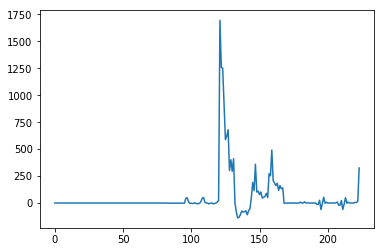

In [75]:
plt.plot(np.linspace(0, 223, 224), test)
plt.show()

# Genres - our response

In [14]:
from Tools.data_cleaning import get_parent_class

In [15]:
# Read data
genres = pd.read_csv('~/fma_metadata/genres.csv', index_col=0)

In [16]:
# Dictionary of genres
converter = genres[["top_level"]].to_dict()["top_level"]
y = tracks[('track', 'genres')].str.replace("[^0-9,]", "")
y = y.apply(lambda x: get_parent_class(x, converter)).to_frame()

In [17]:
# Joining the genres to their ids
y.columns = ['genres']
y = y.join(genres["title"], on = ["genres"])
y.head()

,genres,title
track_id,,
2,21,Hip-Hop
3,21,Hip-Hop
5,21,Hip-Hop
10,10,Pop
20,10,Pop


In [24]:
# Echonest inner-merge with the genres
echonest_genres = echonest.join(y, on="track_id", how='inner')

In [25]:
echonest_genres.head()

,"(echonest, audio_features, acousticness)","(echonest, audio_features, danceability)","(echonest, audio_features, energy)","(echonest, audio_features, instrumentalness)","(echonest, audio_features, liveness)","(echonest, audio_features, speechiness)","(echonest, audio_features, tempo)","(echonest, audio_features, valence)","(echonest, metadata, album_date)","(echonest, metadata, album_name)",...,"(echonest, temporal_features, 216)","(echonest, temporal_features, 217)","(echonest, temporal_features, 218)","(echonest, temporal_features, 219)","(echonest, temporal_features, 220)","(echonest, temporal_features, 221)","(echonest, temporal_features, 222)","(echonest, temporal_features, 223)",genres,title
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,NaN,...,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749,21,Hip-Hop
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,NaN,...,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085,21,Hip-Hop
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,NaN,...,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737,21,Hip-Hop
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,Constant Hitmaker,...,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809,10,Pop
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,NaN,...,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705,21,Hip-Hop


In [26]:
# Missing values
missing_values_table(echonest_genres)

,Missing Values,% of Total Values
"(echonest, audio_features, acousticness)",0,0.000000
"(echonest, audio_features, danceability)",0,0.000000
"(echonest, audio_features, energy)",0,0.000000
"(echonest, audio_features, instrumentalness)",0,0.000000
"(echonest, audio_features, liveness)",0,0.000000
"(echonest, audio_features, speechiness)",0,0.000000
"(echonest, audio_features, tempo)",0,0.000000
"(echonest, audio_features, valence)",0,0.000000
"(echonest, metadata, album_date)",10412,79.305355
"(echonest, metadata, album_name)",10257,78.124762


In [28]:
echonest_features_genres = echonest_genres.merge(features, on = "track_id", how='inner')

In [29]:
echonest_features_genres.head()

,"(echonest, audio_features, acousticness)","(echonest, audio_features, danceability)","(echonest, audio_features, energy)","(echonest, audio_features, instrumentalness)","(echonest, audio_features, liveness)","(echonest, audio_features, speechiness)","(echonest, audio_features, tempo)","(echonest, audio_features, valence)","(echonest, metadata, album_date)","(echonest, metadata, album_name)",...,"(tonnetz, std, 04)","(tonnetz, std, 05)","(tonnetz, std, 06)","(zcr, kurtosis, 01)","(zcr, max, 01)","(zcr, mean, 01)","(zcr, median, 01)","(zcr, min, 01)","(zcr, skew, 01)","(zcr, std, 01)"
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,NaN,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,NaN,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,NaN,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,Constant Hitmaker,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.0,3.542325,0.040800
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,NaN,...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.0,1.806106,0.054623


In [51]:
print("I am \' aazf")

SyntaxError: EOL while scanning string literal (<ipython-input-51-efb5c796e655>, line 1)

In [64]:

names = ["(\'echonest\', \'temporal_features\', \'" + str("%03d" % (i,)) + "\')" for i in range(0, 224)]
names = [name.replace('"', '') for name in names]

In [68]:
numeric_data.head()

,"(echonest, audio_features, acousticness)","(echonest, audio_features, danceability)","(echonest, audio_features, energy)","(echonest, audio_features, instrumentalness)","(echonest, audio_features, liveness)","(echonest, audio_features, speechiness)","(echonest, audio_features, tempo)","(echonest, audio_features, valence)","(echonest, social_features, artist_discovery)","(echonest, social_features, artist_familiarity)",...,"(tonnetz, std, 04)","(tonnetz, std, 05)","(tonnetz, std, 06)","(zcr, kurtosis, 01)","(zcr, max, 01)","(zcr, mean, 01)","(zcr, median, 01)","(zcr, min, 01)","(zcr, skew, 01)","(zcr, std, 01)"
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,0.388990,0.386740,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,0.388990,0.386740,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,0.388990,0.386740,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,0.557339,0.614272,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.0,3.542325,0.040800
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,0.388990,0.386740,...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.0,1.806106,0.054623


In [31]:
data = echonest_features_genres.dropna(axis=1, how='any')

In [32]:
data.shape

(13129, 759)

In [35]:
data.head()

,"(echonest, audio_features, acousticness)","(echonest, audio_features, danceability)","(echonest, audio_features, energy)","(echonest, audio_features, instrumentalness)","(echonest, audio_features, liveness)","(echonest, audio_features, speechiness)","(echonest, audio_features, tempo)","(echonest, audio_features, valence)","(echonest, metadata, artist_name)","(echonest, metadata, release)",...,"(tonnetz, std, 04)","(tonnetz, std, 05)","(tonnetz, std, 06)","(zcr, kurtosis, 01)","(zcr, max, 01)","(zcr, mean, 01)","(zcr, median, 01)","(zcr, min, 01)","(zcr, skew, 01)","(zcr, std, 01)"
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,AWOL,AWOL - A Way Of Life,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,AWOL,AWOL - A Way Of Life,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,AWOL,AWOL - A Way Of Life,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Kurt Vile,Constant Hitmaker,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.0,3.542325,0.040800
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,AWOL,AWOL - A Way Of Life,...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.0,1.806106,0.054623


In [37]:
data.to_csv("../../data_music.csv")

In [36]:
numeric_data = data.select_dtypes(['number'])

In [38]:
numeric_data.columns.values

array([('echonest', 'audio_features', 'acousticness'),
       ('echonest', 'audio_features', 'danceability'),
       ('echonest', 'audio_features', 'energy'),
       ('echonest', 'audio_features', 'instrumentalness'),
       ('echonest', 'audio_features', 'liveness'),
       ('echonest', 'audio_features', 'speechiness'),
       ('echonest', 'audio_features', 'tempo'),
       ('echonest', 'audio_features', 'valence'),
       ('echonest', 'social_features', 'artist_discovery'),
       ('echonest', 'social_features', 'artist_familiarity'),
       ('echonest', 'social_features', 'artist_hotttnesss'),
       ('echonest', 'social_features', 'song_currency'),
       ('echonest', 'social_features', 'song_hotttnesss'),
       ('echonest', 'temporal_features', '000'),
       ('echonest', 'temporal_features', '001'),
       ('echonest', 'temporal_features', '002'),
       ('echonest', 'temporal_features', '003'),
       ('echonest', 'temporal_features', '004'),
       ('echonest', 'temporal_featu

In [39]:
# See a time serie

In [40]:
test = numeric_data.iloc[2,:]

In [ ]:
test[('echonest', 'temporal_features', )]

# Basic pre-processing

In [ ]:
# Features / response split
X, y = numeric_data.drop(['genres'], axis = 1), numeric_data['genres']

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

hyperparameters = {
    'test_size': 0.4
}

def baseline_preprocessing(X, y):
    """
    Baseline pre-processing.
    """
    # Train / test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = hyperparameters['test_size'])

    # Standard Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Principal Component Analysis
    pca = PCA()
    X_pca_train = pca.fit_transform(X_train_scaled)
    X_pca_test = pca.transform(X_test_scaled)

    # Encoding response with proper labels for sklearn
    encoder = LabelEncoder()
    y = encoder.fit_transform(np.asarray(y))

    return(X_train, X_test, y_train, y_test)

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(16, 12))

    plt.bar(range(len(pca.components_)), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(pca.components_)), np.cumsum(pca.explained_variance_ratio_), where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance',fontweight="bold", fontsize=15)
    plt.xlabel('Principal components',fontweight="bold", fontsize=15)
    plt.title('Principal Components Analysis of core features', fontsize=18, color = "#35547a")
    plt.legend(loc = 'best', fontsize = 18)
    plt.tight_layout()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
parameters = {'clf': [
    SVC(),
    MultinomialNB(),
    BernoulliNB(),
    MLPClassifier(max_iter=1000),
    KNeighborsClassifier(),
    SGDClassifier(max_iter=1000),
    RandomForestClassifier(),
    ExtraTreesClassifier(n_estimators="warn", criterion="gini", max_depth=20, n_jobs=None)
]}

pipeline = Pipeline([
    ('clf', SVC())
])

gs_clf = GridSearchCV(pipeline, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X, y)

print("Best score", gs_clf.best_score_)

for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))


In [ ]:

extra.fit(X_train_clusters, y_train)

predictions_extra_train = extra.predict(X_train_clusters)
predictions_extra_test = extra.predict(X_test_clusters)

# Random forests
clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0)
clf.fit(X_train_clusters, y_train)
predictions_clf_train_clusters = clf.predict(X_train_clusters)
predictions_clf_test_clusters = clf.predict(X_test_clusters)

In [ ]:
from sklearn.metrics import accuracy_score
print("Basic Extra-trees:")
print('Train error: ' + str(accuracy_score(y_train, predictions_extra_train)))
print('Test error: ' + str(accuracy_score(y_test, predictions_extra_test)))
print("Basic Random Forests:")
print('Train error: ' + str(accuracy_score(y_train, predictions_clf_train)))
print('Test error: ' + str(accuracy_score(y_test, predictions_clf_test)))

In [ ]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=2, population_size=10, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

# Choices

- [Parameters for the number of clusters when using Affinity Propagation](https://www.psi.toronto.edu/affinitypropagation/faq.html#clusters)
- [Automated ML](https://github.com/EpistasisLab/tpot)

In [ ]:
# Feature importance done by 
importances = clf.feature_importances_
feat_labels = X_train.columns
indices = np.argsort(importances)[::-1]
#for f in range(X_train.shape[1]):
#    print("%2d)%-*s %f"%(f+1, 30, feat_labels[f], importances[indices[f]]))

# Unsupervised Learning

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()
data_t_sne = tsne.fit_transform(X_train)
plt.scatter(data_t_sne[:,0], data_t_sne[:,1], c = y_train)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans()
clusters_kmeans_train = kmeans.fit_predict(X_train)
clusters_kmeans_test = kmeans.predict(X_test)


# plt.scatter(data_t_sne[:,0], data_t_sne[:,1], c = clusters_kmeans)

In [ ]:
from sklearn.cluster import AffinityPropagation
affinity = AffinityPropagation()
clusters_affinity_train = affinity.fit_predict(X_train)
clusters_affinity_test = affinity.predict(X_test)
# plt.scatter(data_t_sne[:,0], data_t_sne[:,1], c = clusters_affinity)

In [ ]:
# Adding clusters to training data
clusters_kmeans_train = pd.DataFrame(clusters_kmeans_train, columns = ['kmeans'])
clusters_kmeans_train.index = X_train.index
clusters_affinity_train = pd.DataFrame(clusters_affinity_train, columns = ['affinity'])
clusters_affinity_train.index = X_train.index
X_train_clusters = pd.concat((X_train, clusters_kmeans_train, clusters_affinity_train), axis = 1)

clusters_kmeans_test = pd.DataFrame(clusters_kmeans_test, columns = ['kmeans'])
clusters_kmeans_test.index = X_test.index
clusters_affinity_test = pd.DataFrame(clusters_affinity_test, columns = ['affinity'])
clusters_affinity_test.index = X_test.index
X_test_clusters = pd.concat((X_test, clusters_kmeans_test, clusters_affinity_test), axis = 1)

In [ ]:
#clusters_affinity_test

In [ ]:
type(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, predictions))

In [ ]:
y = pd.DataFrame(y)

In [ ]:
enc = MultiLabelBinarizer()
genres_indicator = enc.fit_transform(tracks['track', 'genres'])
genres_names = enc.classes_
genres_names = genres.loc[enc.classes_, 'title'].values
cross_correlation = genres_indicator.T @ genres_indicator

# Echonest data

In [ ]:
echonest = pd.read_csv('../fma_metadata/echonest.csv', index_col=0, header=[0, 1, 2])
missing_values_table(echonest)
print("The tracks data set is of size " + str(echonest.shape))
echonest.head()

In [ ]:
raw_echonest = pd.read_csv('../fma_metadata/raw_echonest.csv', header=[0, 1], skipinitialspace=True, index_col=0)

# Albums

## 1 Size

Todo:
* When are tracks mostly added.
* Which tracks got deleted.

In [ ]:
print('{} tracks, {} artists, {} albums, {} genres'.format(
    len(tracks), len(tracks['artist', 'id'].unique()),
    len(tracks['album', 'id'].unique()),
    sum(genres['#tracks'] > 0)))
mean_duration = tracks['track', 'duration'].mean()
print('track duration: {:.0f} days total, {:.0f} seconds average'.format(
    sum(tracks['track', 'duration']) / 3600 / 24,
    mean_duration))

In [ ]:
dimensionality = mean_duration * 44000 * 2
print('sample dimensionality: {:.1e}'.format(dimensionality))
print('total size, i.e. number of audio samples: {:.1e}'.format(dimensionality * len(tracks)))

In [ ]:
for subset in tracks['set', 'subset'].unique():
    indicator = tracks['set', 'subset'] <= subset
    print('{:6} {:6} tracks  {:.1f} days'.format(
        subset, sum(indicator), sum(indicator) * 30 / 3600 / 24))

In [ ]:
print('{} deleted tracks (largest track_id is {})'.format(tracks.index.max() - len(tracks), tracks.index.max()))
print('First track: {}'.format(tracks['track', 'date_created'].min()))

d = pd.DataFrame(tracks.index, index=tracks['track', 'date_created'].values)
d['indicator'] = 1

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

d['track_id'].plot(ax=ax1)
d['indicator'].cumsum().plot(ax=ax1)
ax1.set_ylabel('#tracks')
ax1.set_ylim(0, 160000)

(d['indicator'] * -100).plot(ax=ax2, style='r')  # needed for no apparent reason
color = sns.color_palette('deep', 3)[2]
d['indicator'].resample('2M').sum().fillna(0).plot(ax=ax2, style='--', color=color)
ax2.set_ylabel('#tracks added')
ax2.set_ylim(500, 4500)
ax2.set_ylim(0, 4000)
ax2.grid(False)

lns = ax1.get_lines() + [ax2.get_lines()[1]]
ax1.legend(lns, ['largest track id', '#tracks still present', '#tracks added per 2 months'], loc='lower right')

plt.savefig('growth.pdf')

### 1.1 Splits

In [ ]:
SPLITS = ['training', 'validation', 'test']
SUBSETS = ['small', 'medium', 'large']
print('subset    #train    #val   #test  val_ratio test_ratio')
for subset in SUBSETS:
    counts = [sum((tracks['set', 'split'] == split) & (tracks['set', 'subset'] <= subset)) for split in SPLITS]
    ratios = np.array(counts[0] / counts[1:])
    print('{:8s} {:7d} {:7d} {:7d} {:8.2f} {:9.2f}'.format(subset, *counts, *ratios))

In [ ]:
for subset in ['small', 'medium']:
    subset = tracks['set', 'subset'] <= subset

    d = genres.reset_index().set_index('title')
    d = d.loc[tracks.loc[subset, ('track', 'genre_top')].unique()]

    for split in SPLITS:
        b = tracks['set', 'split'] == split
        d['#' + split] = tracks.loc[subset & b, ('track', 'genre_top')].value_counts()

    d['val_ratio'] = d['#training'] / d['#validation']
    d['test_ratio'] = d['#training'] / d['#test']

    ipd.display(d.sort_values('#training', ascending=False))

In [ ]:
d = pd.DataFrame(index=genres.index, columns=SPLITS)
for genre in genres.index:
    b = tracks['track', 'genres_all'].map(lambda genres: genre in genres)
    d.loc[genre] = tracks.loc[b, ('set', 'split')].value_counts()
d['val_ratio'] = d['training'] / d['validation']
d['test_ratio'] = d['training'] / d['test']
d.sort_values('training', ascending=False, inplace=True)
ipd.display(d.head(10))
ipd.display(d.tail(10))

## 2 Metadata

In [ ]:
def isnull(column, df=tracks):
    if column[1] in ['tags', 'genres', 'genres_all']:
        return df[column].apply(lambda x: len(x) == 0)
    elif df.dtypes[column] == np.int:
        return df[column] <= 0
    else:
        return df[column].isnull()

def count(series):
    col0 = series.name[0]
    df = tracks if col0 == 'track' else tracks.drop_duplicates((col0, 'id'))
    n = (~isnull(series.name, df)).sum()
    p = n / len(df) * 100
    return n, p

# Columns / metadata usage across dataset.
d = pd.DataFrame(index=tracks.columns.drop('set'), columns=['n', 'p'])
d = d.apply(count, axis=1)
d['n'] = d['n'].astype(np.int)
d

In [ ]:
# Excerpt as example in the paper.
columns = [
    ('track', 'title'),
    ('track', 'genres_all'),
    ('track', 'genre_top'),
    ('track', 'duration'),
    ('track', 'listens'),
    ('album', 'title'),
    ('album', 'listens'),
    ('album', 'tags'),
    ('artist', 'name'),
    ('artist', 'location'),
]

non_null = ~isnull(columns[0])
for column in columns[1:]:
    non_null &= ~isnull(column)
tids = np.random.RandomState(42).permutation(tracks.index[non_null])[:8]
tracks.loc[tids, columns].head() #.to_latex()

In [ ]:
tracks['track', 'license'].value_counts().head(10)

In [ ]:
tracks['track', 'language_code'].value_counts().head(10)

### 2.1 Technical data

In [ ]:
durations = tracks['track', 'duration']
plt.figure(figsize=(10, 4))
p = sns.distplot(durations[durations.values < 800], kde=False, rug=False, color='k', hist_kws=dict(alpha=0.4))
p.set_xlabel('duration [seconds]')
p.set_ylabel('#tracks')
p.set_xlim(0, 800)
plt.tight_layout()
plt.savefig('duration_distribution.pdf')

durations.describe()

In [ ]:
# Uncommon bit rates are VBR encodings.
print('Common bit rates: {}'.format(tracks['track', 'bit_rate'].value_counts().head(5).index.tolist()))
print('Average bit rate: {:.0f} kbit/s'.format(tracks['track', 'bit_rate'].mean()/1000))
p = sns.distplot(tracks['track', 'bit_rate'], kde=False, rug=False)
p.set_xlabel('bit rate')
p.set_ylabel('#tracks');

### 2.2 User data

In [ ]:
# Tags.
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

d = tracks['track', 'tags'].apply(len)
print(d.min(), d.max())
d = d[(d.values >= 1) & (d.values <= 16)]
color = sns.color_palette('deep', 3)[2]
sns.distplot(d, kde=False, bins=d.max()-d.min(), label='track', ax=ax1, color=color)

d = tracks.drop_duplicates(('album', 'id'))
d = d['album', 'tags'].apply(len)
print(d.min(), d.max())
d = d[(d.values >= 1) & (d.values <= 16)]
sns.distplot(d, kde=False, bins=d.max()-d.min(), label='album', ax=ax2)

d = tracks.drop_duplicates(('artist', 'id'))
d = d['artist', 'tags'].apply(len) - 1
print(d.min(), d.max())
d = d[(d.values >= 1) & (d.values <= 16)]
sns.distplot(d, kde=False, bins=d.max()-d.min(), label='artist', ax=ax2)

ax1.set_xlabel('#tags')
ax1.set_ylabel('#tracks')
ax2.set_ylabel('#artists   /   #albums')
ax1.set_xlim(d.min(), d.max())
ax1.set_ylim(0, 5000)
ax2.set_ylim(0, 500)
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
ax2.grid(False)

plt.tight_layout()
plt.savefig('tag_distribution.pdf')

In [ ]:
# One artist tag is often the artist name.
col = 'artist'
d = tracks.drop_duplicates((col, 'id'))
d.loc[d[col, 'tags'].apply(len) > 0, [('artist', 'name'), (col, 'tags')]].head()

In [ ]:
# Listens, favorites, comments.

def plot(col0, col1, maxval, subplot=None):
    if col0 == 'track':
        d = tracks['track']
    if col0 in ['artist', 'album']:
        d = tracks[col0].drop_duplicates('id')
    if subplot:
        plt.subplot(subplot)
    d = d[col1]
    p = sns.distplot(d[d.values < maxval], kde=False, color='k', hist_kws=dict(alpha=0.4))
    p.set_xlim(-1, maxval)
    p.set_xlabel('#' + col1)
    p.set_ylabel('#' + col0 + 's')

plt.figure(figsize=(17, 10))
plot('track', 'listens', 10e3, 221)
plot('track', 'interest', 10e3, 222)
plot('track', 'favorites', 100, 223)
plot('track', 'comments', 20, 224)

plt.figure(figsize=(17, 10))
plot('album', 'listens', 100e3, 221)
plot('album', 'favorites', 100, 223)
plot('album', 'comments', 20, 224)

plt.figure(figsize=(17, 5))
plot('artist', 'favorites', 100, 121)
plot('artist', 'comments', 20, 122)

In [ ]:
# Same as above, formated for the paper.
plt.figure(figsize=(10, 4))
plot('album', 'listens', 40e3)
plt.tight_layout()
plt.savefig('listens_distribution.pdf')

tracks['album', 'listens'].max()

In [ ]:
# Most listened albums.
tracks['album'].groupby('id').first().sort_values('listens', ascending=False).head(10)

### 2.3 Dates

In [ ]:
def plot(col0, col1):
    if col0 == 'track':
        d = tracks['track']
    if col0 in ['artist', 'album']:
        d = tracks[col0].drop_duplicates('id')
    d = pd.Series(1, index=d[col1])
    d.resample('A').sum().fillna(0).plot()

plt.figure()
plot('track', 'date_recorded')
plot('album', 'date_released')

plt.figure()
plot('artist', 'active_year_begin')
plot('artist', 'active_year_end')

plt.figure()
plot('track', 'date_created')
plot('album', 'date_created')
plot('artist', 'date_created')

In [ ]:
# Same as above, formated for the paper.
plt.figure(figsize=(5, 4))
d = tracks['album'].drop_duplicates('id')
d = pd.Series(1, index=d['date_released'])
d = d.resample('A').sum().fillna(0)
b = d.index >= pd.to_datetime(1990, format='%Y')
b &= d.index <= pd.to_datetime(2017, format='%Y')
d[b].plot(color='k')
plt.xlabel('release year')
plt.ylabel('#albums')
plt.tight_layout()
plt.savefig('album_release_year.pdf')

d.index.min().year, d.index.max().year

## 3 Artists & albums effect

In [ ]:
for effect in ['artist', 'album']:
    d = tracks[effect, 'id'].value_counts()
    ipd.display(d.head(5))
    p = sns.distplot(d[(d.values < 50) & (d.values >= 0)], kde=False)
    p.set_xlabel('#tracks per ' + effect);
    p.set_ylabel('#' + effect + 's');

In [ ]:
counts = pd.Series(index=genres.loc[genres['parent'] == 0, 'title'].values, name='#artists')
for genre in counts.index:
    counts[genre] = len(tracks.loc[tracks['track', 'genre_top'] == genre, ('artist', 'id')].unique())
counts.sort_values(ascending=False).plot.bar()
plt.ylabel('#artists');

## 4 Genres

In [ ]:
a = set(tracks['track', 'genre_top'].unique().dropna())
b = set(genres.loc[genres['top_level'].unique(), 'title'].values)
assert a == b

print('{} top-level genres'.format(len(a)))
genres[genres['parent'] == 0].sort_values('#tracks', ascending=False)

In [ ]:
p = sns.distplot(tracks['track', 'genres'].map(len), kde=False, bins=range(32))
p = sns.distplot(tracks['track', 'genres_all'].map(len), kde=False, bins=range(32))
p.set_xlabel('#genres per track')
p.set_ylabel('#tracks');
#tracks['track', 'genres_all'].map(len).describe()
#tracks['track', 'genres_all'].map(len).value_counts()

In [ ]:
# Same as above, formatted for the paper.
plt.figure(figsize=(5, 4))
d = tracks['track', 'genres_all'].map(len)
p = sns.distplot(d[d.values <= 10], kde=False, bins=range(11), color='k', hist_kws=dict(alpha=0.4))
p.set_xlabel('#genres per track')
p.set_ylabel('#tracks');
p.set_xlim(0, 10)
p.set_xticks(range(11));
plt.tight_layout()
plt.savefig('genres_per_track.pdf')

d.min(), d.max()

In [ ]:
# Number of tracks per genre (full).
d = genres[genres['#tracks'] > 2000].sort_values('#tracks', ascending=False)
plt.figure(figsize=(10, 4))
p = sns.barplot('title', '#tracks', data=d, color='k', alpha=0.4)
p.set_xlabel('')
p.set_ylabel('#tracks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('genre_distribution.pdf')

genres.loc[genres['#tracks'] > 0, '#tracks'].min(), genres['#tracks'].max()

In [ ]:
# Number of tracks per top-level genre (medium).
d = tracks[tracks['set', 'subset'] <= 'medium']
d = d['track', 'genre_top'].value_counts()
plt.figure(figsize=(10, 4))
d.plot.bar(color='k', alpha=0.4)
plt.ylabel('#tracks')
plt.tight_layout()
plt.savefig('genre_top_distribution.pdf')

d

### 4.1 Genre hierarchy

* As genres have parent genres, we can plot a tree using the [DOT] language.
* Save the full genre tree as a PDF.

Todo:
* Color nodes according to FMA genre color.
* Better looking tree.

[DOT]: https://en.wikipedia.org/wiki/DOT_(graph_description_language)

In [ ]:
g = utils.Genres(genres)
graph = g.create_tree([25, 31], 1)
ipd.Image(graph.create_png())

In [ ]:
graph = g.create_tree(14)
graph.write_pdf('genre_hierarchy.pdf');

roots = g.find_roots()
print('{} roots'.format(len(roots)))
graph = g.create_tree(roots)
graph.write_pdf('genre_hierarchy.pdf');

### 4.2 Cross-appearance

Todo:
* Group rows and columns for better identification of related genres.

In [ ]:
enc = MultiLabelBinarizer()
genres_indicator = enc.fit_transform(tracks['track', 'genres'])
genres_names = enc.classes_
genres_names = genres.loc[enc.classes_, 'title'].values
cross_correlation = genres_indicator.T @ genres_indicator

In [ ]:
np.fill_diagonal(cross_correlation, 0)

plt.figure(figsize=(28, 28))
plt.imshow(np.log(cross_correlation))
plt.yticks(range(len(genres_names)), genres_names);
plt.xticks(range(len(genres_names)), genres_names, rotation=90);

In [ ]:
cross_correlation = np.tril(cross_correlation, k=-1)
sort = np.argsort(cross_correlation.flatten())

N = 20
indices = np.unravel_index(sort[:-N:-1], cross_correlation.shape)
for i, j in zip(*indices):
    print('{}: {} | {}'.format(cross_correlation[i, j], genres_names[i], genres_names[j]))

## 5 Audio

Todo: e.g. audio features (echonest / librosa, spectrograms) to show diversity.

## 6 Features

Todo: understand features by listening to segments who have them, e.g. <http://musicinformationretrieval.com/feature_sonification.html>.

In [ ]:
features.head(5).style.format('{:.2f}')

In [ ]:
sns.pairplot(features.loc[:, ('mfcc', 'mean', slice('01','03'))]);
sns.pairplot(features.loc[:, ('mfcc', 'std', slice('01','03'))]);

## 7 Echonest features

In [ ]:
print('Echonest features available for {} tracks.'.format(len(echonest)))